In [65]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance

from hnmchallenge.constant import *
from hnmchallenge.data_reader import DataReader
from hnmchallenge.dataset import Dataset
from hnmchallenge.evaluation.python_evaluation import map_at_k, recall_at_k
from hnmchallenge.feature_manager import FeatureManager
from hnmchallenge.filtered_dataset import FilterdDataset
from hnmchallenge.models.ease.ease import EASE
from hnmchallenge.models.itemknn.itemknn import ItemKNN
from hnmchallenge.models.sgmc.sgmc import SGMC
from hnmchallenge.models.top_pop import TopPop
from hnmchallenge.stratified_dataset import StratifiedDataset

In [66]:
dataset = StratifiedDataset()
dr = DataReader()

In [67]:
base_load_path = dr.get_preprocessed_data_path() / "xgb_models"

In [68]:
VERSION = 0
DATASET = f"dataset_v9_{VERSION}.feather"
MODEL_NAME = f"xgb_{DATASET}.json"

In [69]:
model = xgb.XGBRanker()
model.load_model(base_load_path/MODEL_NAME)

In [70]:
from xgboost import plot_importance

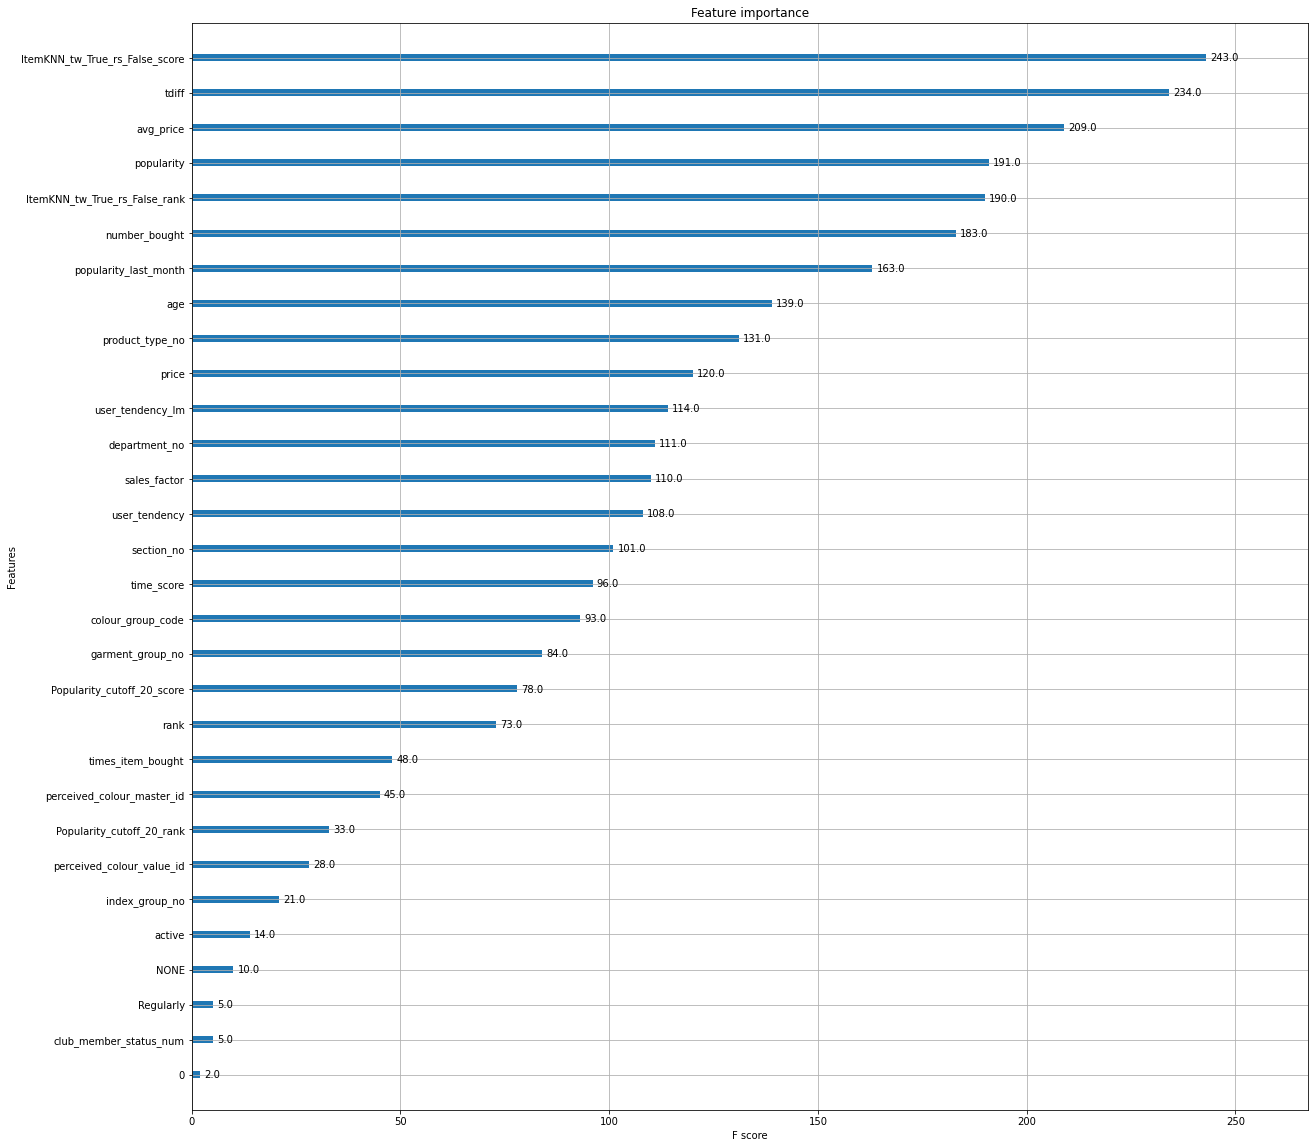

In [71]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(model, ax=ax)
plt.show()

In [72]:
model.best_ntree_limit

69

In [73]:
features = pd.read_feather(dr.get_preprocessed_data_path()/ f"dataset_dfs/full/{DATASET}")

# Remember to use the bert_ntree_limit when taking the predictions

In [74]:
features.head()

,customer_id,ItemKNN_tw_True_rs_False_score,ItemKNN_tw_True_rs_False_rank,Popularity_cutoff_20_score,Popularity_cutoff_20_rank,article_id,rank,colour_group_code,department_no,garment_group_no,...,0,Monthly,NONE,Regularly,avg_price,user_tendency,user_tendency_lm,time_score,tdiff,times_item_bought
0,0,0.010266,1.0,NaN,NaN,1482.0,0,71,1747,1009,...,0,0,1,0,0.027085,0.214286,NaN,1.0,0.006211,1.0
1,0,0.001113,86.0,NaN,NaN,3592.0,1,9,1643,1002,...,0,0,1,0,0.027085,0.214286,NaN,NaN,NaN,NaN
2,0,0.001119,85.0,NaN,NaN,129.0,2,9,3509,1019,...,0,0,1,0,0.027085,0.214286,NaN,NaN,NaN,NaN
3,0,0.001131,84.0,NaN,NaN,331.0,3,9,1522,1010,...,0,0,1,0,0.027085,0.214286,NaN,NaN,NaN,NaN
4,0,0.001147,83.0,NaN,NaN,6575.0,4,71,1747,1009,...,0,0,1,0,0.027085,0.214286,NaN,NaN,NaN,NaN


In [75]:
customer_article_df = features[[DEFAULT_USER_COL, DEFAULT_ITEM_COL]].copy()
X = features.drop([DEFAULT_USER_COL, DEFAULT_ITEM_COL], axis=1)

In [76]:
X.head()

,ItemKNN_tw_True_rs_False_score,ItemKNN_tw_True_rs_False_rank,Popularity_cutoff_20_score,Popularity_cutoff_20_rank,rank,colour_group_code,department_no,garment_group_no,index_group_no,popularity,...,0,Monthly,NONE,Regularly,avg_price,user_tendency,user_tendency_lm,time_score,tdiff,times_item_bought
0,0.010266,1.0,NaN,NaN,0,71,1747,1009,2,9558.0,...,0,0,1,0,0.027085,0.214286,NaN,1.0,0.006211,1.0
1,0.001113,86.0,NaN,NaN,1,9,1643,1002,2,1898.0,...,0,0,1,0,0.027085,0.214286,NaN,NaN,NaN,NaN
2,0.001119,85.0,NaN,NaN,2,9,3509,1019,1,1021.0,...,0,0,1,0,0.027085,0.214286,NaN,NaN,NaN,NaN
3,0.001131,84.0,NaN,NaN,3,9,1522,1010,1,1686.0,...,0,0,1,0,0.027085,0.214286,NaN,NaN,NaN,NaN
4,0.001147,83.0,NaN,NaN,4,71,1747,1009,2,711.0,...,0,0,1,0,0.027085,0.214286,NaN,NaN,NaN,NaN


In [77]:
y_pred = model.predict(X, ntree_limit=model.best_ntree_limit)

/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [78]:
customer_article_df["predicted_score"] = y_pred

In [79]:
customer_article_df

,customer_id,article_id,predicted_score
0,0,1482.0,2.092026
1,0,3592.0,0.118455
2,0,129.0,-0.670928
3,0,331.0,-0.322201
4,0,6575.0,-1.109101
...,...,...,...
133631452,1136205,20285.0,0.590497
133631453,1136205,1330.0,0.280029
133631454,1136205,1793.0,0.881119
133631455,1136205,8347.0,1.889336


In [80]:
sorted_scores = customer_article_df.sort_values([DEFAULT_USER_COL, "predicted_score"], ascending=[True, False])

In [81]:
sorted_scores

,customer_id,article_id,predicted_score
70,0,1638.0,2.127356
0,0,1482.0,2.092026
85,0,1797.0,2.042016
84,0,4861.0,1.870298
76,0,1562.0,1.466821
...,...,...,...
133631365,1136205,11662.0,-0.718392
133631364,1136205,2646.0,-0.718869
133631350,1136205,1638.0,-0.750871
133631386,1136205,9027.0,-0.797503


In [82]:
sorted_scores_index = sorted_scores.reset_index(drop=True)

In [83]:
cutoff = sorted_scores_index.groupby(DEFAULT_USER_COL).size().values
i=0 
filter_indices = []
for cut in cutoff:
    filter_indices.extend(range(i, i+12))
    i=i+cut

In [84]:
cutoff.mean()

117.61199729626493

In [85]:
final_df = sorted_scores_index.loc[filter_indices]

In [86]:
final_df

,customer_id,article_id,predicted_score
0,0,1638.0,2.127356
1,0,1482.0,2.092026
2,0,1797.0,2.042016
3,0,4861.0,1.870298
4,0,1562.0,1.466821
...,...,...,...
133631344,1136205,17630.0,1.665242
133631345,1136205,10994.0,1.289878
133631346,1136205,2609.0,1.230063
133631347,1136205,10101.0,1.169135


In [87]:
final_final_df = final_df.drop("predicted_score", axis=1)

In [88]:
from hnmchallenge.submission_handler import SubmissionHandler
sh = SubmissionHandler()                                               

In [89]:
sh.create_submission_filtered_data([final_final_df], sub_name="xgb_9")